In [46]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [47]:
# Load dataset
file_path = "Mall_Customers.csv"
df = pd.read_csv(file_path)


In [48]:
# Display first few rows
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [49]:
# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [50]:
# Rename columns for easier access
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']


In [51]:
# Drop CustomerID (not needed for clustering)
df = df.drop(columns=['CustomerID'])


In [52]:
# Encode Gender (convert categorical to numerical)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [53]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())



Summary Statistics:
            Gender         Age  Annual_Income  Spending_Score
count  200.000000  200.000000     200.000000      200.000000
mean     0.440000   38.850000      60.560000       50.200000
std      0.497633   13.969007      26.264721       25.823522
min      0.000000   18.000000      15.000000        1.000000
25%      0.000000   28.750000      41.500000       34.750000
50%      0.000000   36.000000      61.500000       50.000000
75%      1.000000   49.000000      78.000000       73.000000
max      1.000000   70.000000     137.000000       99.000000


In [54]:
#Checking values have been replaced properly
df.Gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

In [55]:
#Checking the size of our data
df.shape

(200, 4)

In [56]:
df.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

C:\Users\DELL\AppData\Local\Temp\ipykernel_29068\3573476930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


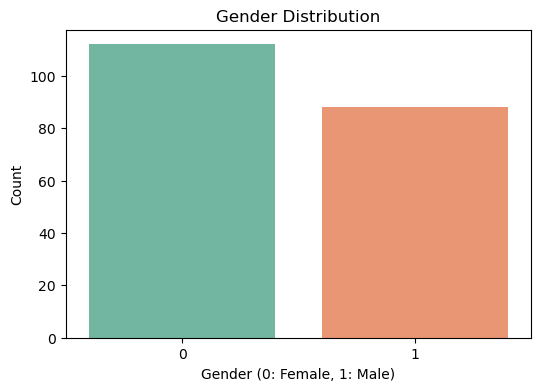

In [57]:
# 2. Countplot for Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

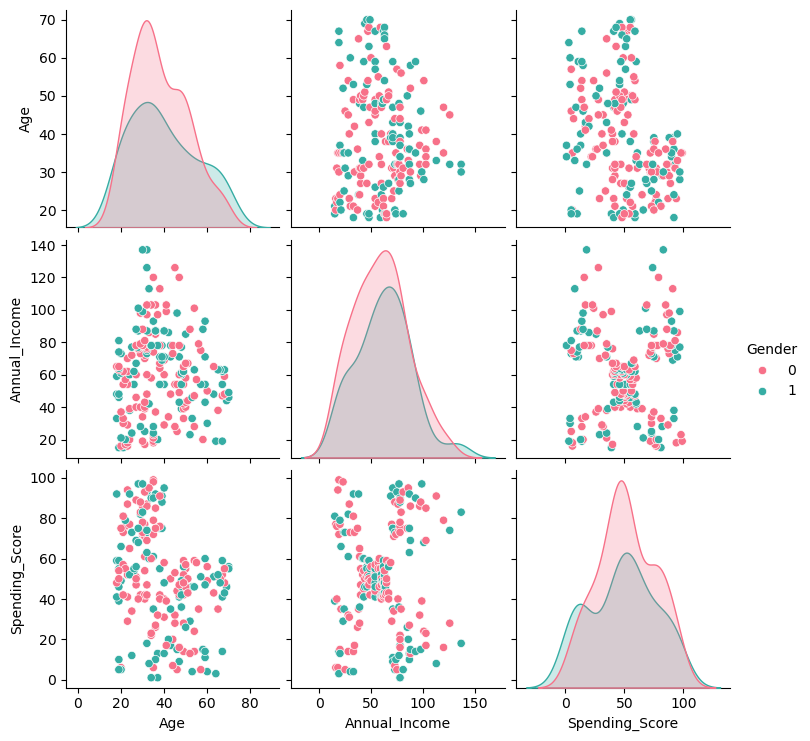

In [58]:
# 3. Pairplot to visualize relationships
sns.pairplot(df, hue="Gender", palette="husl")
plt.show()


In [59]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [60]:
inertia = []
K_range = range(1, 11)  # Try k=1 to k=10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Use the same preprocessed data
    inertia.append(kmeans.inertia_)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [61]:
### ------ K-Means Clustering ------ ###

# Select features for clustering
X = df[['Age', 'Annual_Income', 'Spending_Score']]


In [62]:
# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [63]:
# Finding optimal clusters using Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

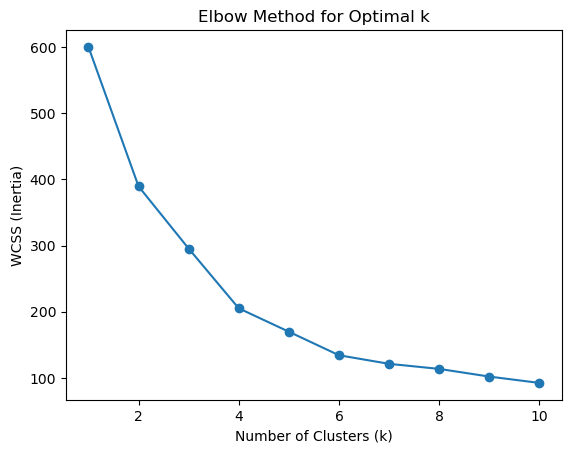

In [64]:
# Plot the Elbow Method graph
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

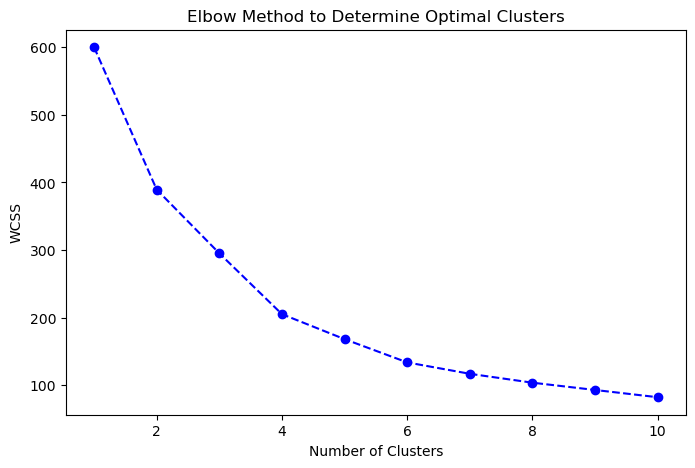

In [65]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()


In [18]:
# Apply K-Means with optimal clusters (assume k=5 based on Elbow Method)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


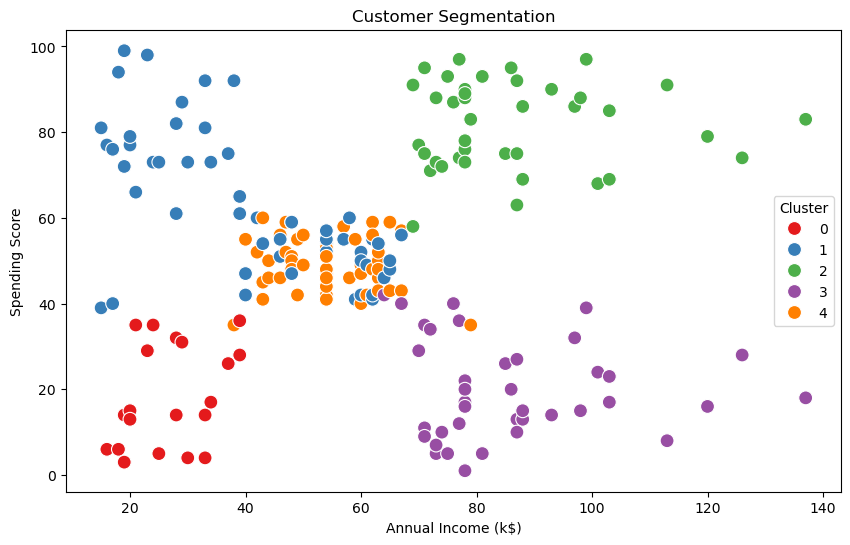

In [19]:
# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()


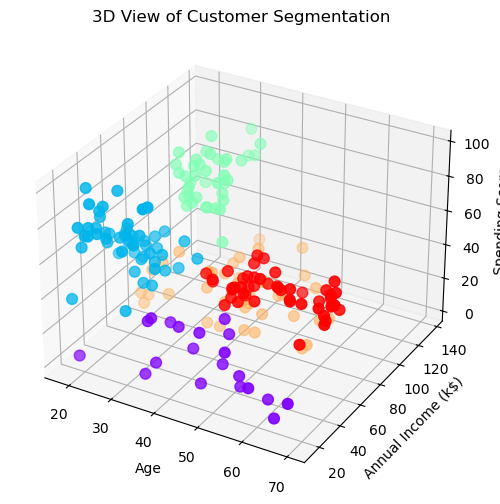

In [20]:
# 3D Scatter Plot for Clusters
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual_Income'], df['Spending_Score'], c=df['Cluster'], cmap='rainbow', s=60)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')
ax.set_title('3D View of Customer Segmentation')
plt.show()

In [22]:
import pickle

# Save the trained K-Means model
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

print("✅ K-Means model saved successfully!")

✅ K-Means model saved successfully!
